/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape:(26, 2)

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Shape of cancer data:(569, 30)

Sample counts per class:
{'malignant': 212, 'benign': 357}

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Data shape:(506, 13)

X.shape:(506, 104)

Test set predictions:[1 0 1 0 1 0 0]

Test set accuracy:0.86


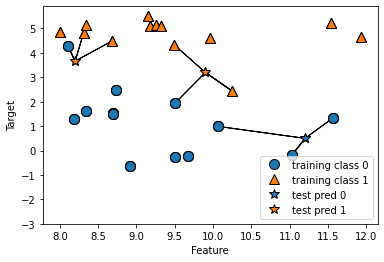

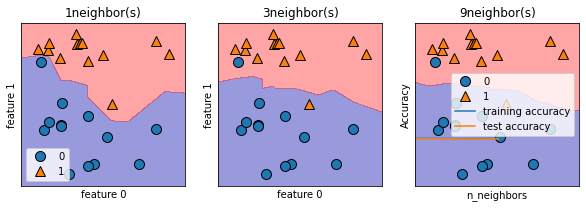

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Test set R^2:0.83


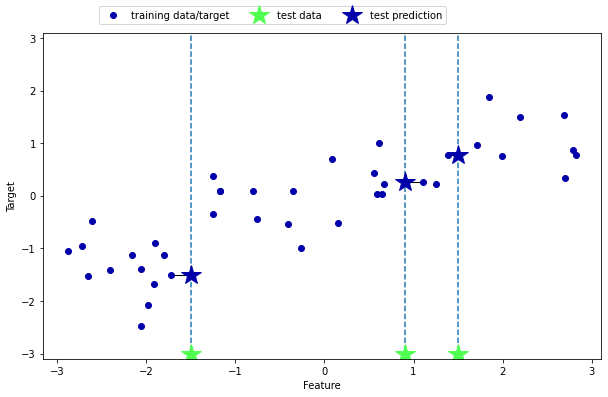

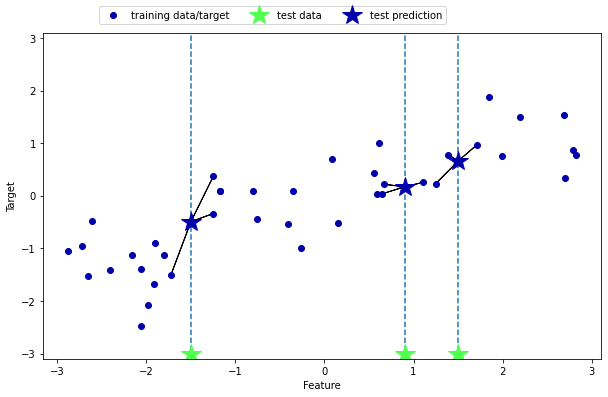

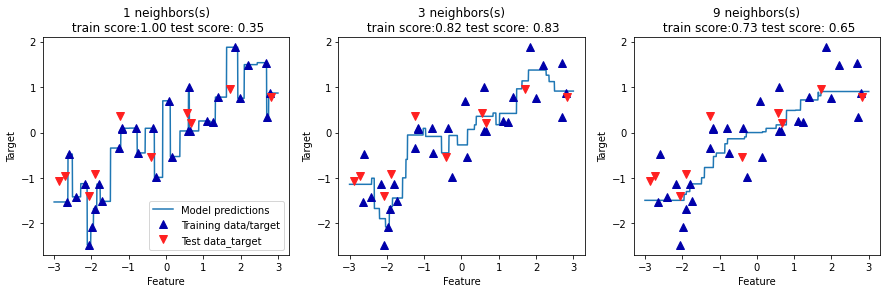

In [23]:

#ライブラリのインストール p11
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import mglearn


#In[1]-------------
#データセットの生成
X, y = mglearn.datasets.make_forge()
#データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # [:行,列] 列は特徴量であり、0列目の特徴量をx軸に1列目の特徴量をy軸にプロット
plt.legend(["Class 0", "Class 1"], loc=4) # loc=4は右下に凡例を示す
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}\n".format(X.shape)) #２つの特徴量を持つ２６のデータポイントで構成されている。


#In[2]-------------
X, y = mglearn.datasets.make_wave(n_samples=40) #４０個の点について1つの特徴量とターゲットの値を持つ
plt.plot(X, y, 'o') # 特徴量をx軸に、回帰のターゲット(出力)をy軸に取る。marker='o' 
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


#In[3]---------------------------
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}\n".format(cancer.keys()))


#In[4]---------------
print("Shape of cancer data:{}\n".format(cancer.data.shape)) #３０の特徴量を持つ５６９のデータポイントで構成されている


#In[5]-------------
# https://teratail.com/questions/240808
# target_namesはクラス名
print("Sample counts per class:\n{}\n".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})) #５６９のデータセットのうち、２１２が悪性で３５７が良性



#In[6]------------
print("Feature names:\n{}\n".format(cancer.feature_names)) #個々の特徴量の意味を示す記述は、feature_names属性に格納されている


#In[7]-------------
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:{}\n".format(boston.data.shape)) #１３の特徴量を持つ５０６のデータセットが含まれる


#In[8]------------------
X, y = mglearn.datasets.load_extended_boston() # 特徴量間の積も含まれたデータセットをロード
print("X.shape:{}\n".format(X.shape)) #１０４＝１３の特徴量から２つの特徴量を選ぶ重複ありの組み合わせ９１を足したもの


#In[9]-----------------
mglearn.plots.plot_knn_classification(n_neighbors=1)


#In[10]---------------
mglearn.plots.plot_knn_classification(n_neighbors=3)


#In[11]---------------
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() #データセットを用意

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#In[12]-------------
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #クラス分類機を生成(近傍点数は３)


#In[13]--------------
clf.fit(X_train, y_train)


#In[14]-------------
print("Test set predictions:{}\n".format(clf.predict(X_test))) #テストセットのそれぞれのクラスを予測


#In[15]----------------
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test))) #テストセットに対する精度を出力 
#{インデックス番号:書式指定}で、.2は小数点以下の桁数が２で、fは小数点タイプで表示することを表す


#In[16]-------------------
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) #１行３列のグラフを横1000px縦300pxで作成 

#近傍点数が１,３,９の場合の決定境界を生成, axesは一つのグラフ
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので、１行でインスタンスを生成してfitすることができる
    # plot_2d_separaterは二次元で境界線を作って作画するメソッド
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    # dicsrete_scatterは第一引数 x 座標、第二引数 y 座標、第３引数 分類、ax 引数 作画対象の表を指定して、種類と色別に作画してくれるライブラリ。
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3) # loc３は左下に凡例を表示


#In[17]---------------------
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを１から１０まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train)) #append = 配列に数を追加する
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


#In[18]-------------------------
mglearn.plots.plot_knn_regression(n_neighbors=1)


#In[19]---------------------
mglearn.plots.plot_knn_regression(n_neighbors=3)


#In[20]---------------------
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

#　waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)


#In[21]-------------------------
print("Test set predictions:\n{}\n".format(reg.predict(X_test))) #テストセットに対する精度


#In[22]---------------------
print("Test set R^2:{:.2f}".format(reg.score(X_test, y_test)))


#In[23]-------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#ー３から３までの間に１０００点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # reshape(-1, 1)は配列を列ベクトルにする
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # インスタンスを生成する
    reg.fit(X_train, y_train) # 訓練データと訓練ターゲットを用いてモデルを学習させる
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # マーカーの形，色，大きさを指定
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors(s)\n train score:{:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data_target"], loc="best")



